In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import hvplot
from matplotlib import cm
from datetime import datetime
from pyproj import Transformer
from scipy.ndimage import convolve
# import holoviews as hv
# from holoviews import opts

# hv.extension('bokeh', 'matplotlib')

In [2]:
%run -i ncbx_funcs.py

Shape of xisl, yisl:  (1057, 1317) (1057, 1317)
Index of shoreline and y-location:
[168] [329.27781985]
Offshore model domain (dy_offshore):  [4453.85735021] , onshore (dy_onshore):  [5530.01136684]


In [3]:
url_CSNV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw44/Output/dorian_his.ncml'
url_CSYV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw45/Output/dorian_his.ncml'
url_FSYV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw50/Output/dorian_his.ncml'
url_FSNV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw51/Output/dorian_his.ncml'
#url_CSYV = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/core_banks_jcw45/Output/dorian_his.ncml'
run = 'CSYV'
ds_CSYV = xr.open_dataset(url_CSYV)
ds_CSYV

<xarray.Dataset> Size: 35GB
Dimensions:                 (tracer: 4, NST: 3, s_rho: 8, s_w: 9,
                             eta_rho: 1057, xi_rho: 1317, eta_u: 1057,
                             xi_u: 1316, eta_v: 1056, xi_v: 1317,
                             eta_psi: 1056, xi_psi: 1316, ocean_time: 37,
                             NVEG: 3, Nbed: 1)
Coordinates:
  * s_rho                   (s_rho) float64 64B -0.9375 -0.8125 ... -0.0625
  * s_w                     (s_w) float64 72B -1.0 -0.875 -0.75 ... -0.125 0.0
    lon_rho                 (eta_rho, xi_rho) float64 11MB ...
    lat_rho                 (eta_rho, xi_rho) float64 11MB ...
    lon_u                   (eta_u, xi_u) float64 11MB ...
    lat_u                   (eta_u, xi_u) float64 11MB ...
    lon_v                   (eta_v, xi_v) float64 11MB ...
    lat_v                   (eta_v, xi_v) float64 11MB ...
    lon_psi                 (eta_psi, xi_psi) float64 11MB ...
    lat_psi                 (eta_psi, xi_psi) float64 11MB ...
  * ocean_time              (ocean_time) datetime64[ns] 296B 2019-09-06T10:15...
Dimensions without coordinates: tracer, NST, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi, NVEG, Nbed
Data variables: (12/182)
    ntimes                  int32 4B ...
    ndtfast                 int32 4B ...
    dt                      float64 8B ...
    dtfast                  float64 8B ...
    dstart                  datetime64[ns] 8B ...
    nHIS                    int32 4B ...
    ...                      ...
    Dwave                   (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Pwave_top               (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_fric             (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_break            (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_wcap             (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dissip_roller           (ocean_time, eta_rho, xi_rho) float32 206MB ...
Attributes: (12/33)
    file:                      ./Output/Dorian_NCB_his_00019.nc
    format:                    netCDF-3 64bit offset file
    Conventions:               CF-1.4, SGRID-0.3
    type:                      ROMS/TOMS history file
    title:                     Hurricane Dorian North Core Banks
    var_info:                  varinfo.dat
    ...                        ...
    tiling:                    015x012
    history:                   ROMS/TOMS, Version 3.9, Saturday - October 15,...
    ana_file:                  ROMS/Functionals/ana_btflux.h, ROMS/Functional...
    CPP_options:               COREBANKS, ANA_BPFLUX, ANA_BSFLUX, ANA_BTFLUX,...
    EXTRA_DIMENSION.N:         8
    EXTRA_DIMENSION.boundary:  4

In [4]:
t=ds_CSYV.ocean_time.load()
tstring = pd.to_datetime(t).strftime('%Y-%m-%d %H:%M')
tstring

Index(['2019-09-06 10:15', '2019-09-06 10:30', '2019-09-06 10:45',
       '2019-09-06 11:00', '2019-09-06 11:15', '2019-09-06 11:30',
       '2019-09-06 11:45', '2019-09-06 12:00', '2019-09-06 12:15',
       '2019-09-06 12:30', '2019-09-06 12:45', '2019-09-06 13:00',
       '2019-09-06 13:14', '2019-09-06 13:29', '2019-09-06 13:44',
       '2019-09-06 13:59', '2019-09-06 14:14', '2019-09-06 14:29',
       '2019-09-06 14:45', '2019-09-06 15:00', '2019-09-06 15:15',
       '2019-09-06 15:30', '2019-09-06 15:45', '2019-09-06 16:00',
       '2019-09-06 16:15', '2019-09-06 16:30', '2019-09-06 16:45',
       '2019-09-06 17:00', '2019-09-06 17:15', '2019-09-06 17:30',
       '2019-09-06 17:45', '2019-09-06 18:00', '2019-09-06 18:15',
       '2019-09-06 18:30', '2019-09-06 18:45', '2019-09-06 19:00',
       '2019-09-06 19:15'],
      dtype='object')

In [5]:
# load lat/lon, convert to island coordinates
lon = np.squeeze( ds_CSYV.lon_rho.load().values )
lat = np.squeeze( ds_CSYV.lat_rho.load().values )

# Convert lat/lon to UTM zone 18N, and then to island coordinates
transformer = Transformer.from_crs( 'epsg:4326', 'epsg:26918',  ) # WGS84 to UTM18
utmx, utmy = transformer.transform( lat, lon )
xisl, yisl = UTM2Island(utmx, utmy, eoff=383520.0, noff=3860830.0, rot=42.0)
print('Shape of xisl, yisl: ', xisl.shape, yisl.shape)

Shape of xisl, yisl:  (1057, 1317) (1057, 1317)


In [6]:
bt = ds_CSYV.bed_thickness[0,:,:,:].load().values

In [7]:
# load initial and final bathymetry - for most of these plots, we will look at CSYV
# Minus sign converts from depth to elevation
bathi = -ds_CSYV.bath[1,:,:].load().values
bathf = -ds_CSYV.bath[-1,:,:].load().values
bdiff = bathf - bathi

# smooth bathy for making contour maps
# experimenting with size of kernal suggest 15 is ok
ik = 15
k = np.ones((ik, ik)) / (ik*ik)
bathis = convolve(bathi,k,mode='nearest')
bathfs = convolve(bathf,k,mode='nearest')

# area calculations
pm = ds_CSYV.pm[:,:].load().values
pn = ds_CSYV.pn[:,:].load().values
area = 1./pm * 1./pn
print('Shape of area: ', area.shape)

vdiff = bdiff * area
print(np.sum(area))
print(np.sum(bdiff))
print(np.sum(vdiff))
print('bdiff')
stat_summary(bdiff, iprint=True)
print('vdiff')
stat_summary(vdiff, iprint=True)

Shape of area:  (1057, 1317)
19821987.311535504
-70593.43
243145.0925447774
bdiff
  n, nnan, nvalid:  1057 0 1057
  mean, std, min, max   : -0.051 0.353 -4.542 1.478
  d5, d25, d50, d75, d95: -0.410 -0.023 0.001 0.018 0.196
vdiff
  n, nnan, nvalid:  1057 0 1057
  mean, std, min, max   : 0.175 1.929 -49.830 70.158
  d5, d25, d50, d75, d95: -1.315 -0.134 0.005 0.146 2.611


{'n': 1057,
 'nnan': 0,
 'nvalid': 1057,
 'mean': 0.1746645407266288,
 'std': 1.9289193419431026,
 'min': -49.83044298234731,
 'max': 70.15775635512807,
 'd5': -1.315193128668792,
 'd25': -0.1340415790105609,
 'd50': 0.0045960437262363195,
 'd75': 0.146177606007145,
 'd95': 2.6111112905774303}

In [8]:
# Use a central line for cross-shore distance
y = np.squeeze( yisl[:,550] )

# find the average shoreline location
mbathi = np.mean(bathi[:,100:1200], axis=1)
mbathf = np.mean(bathf[:,100:1200], axis=1)
ishorey = np.argwhere(mbathi>=0.)[0]
print(ishorey, y[ishorey])

# use this for the cross-shore location by adding the offset
offset = y[ishorey]
y = y-offset
yisl = yisl-offset
xisl = xisl-np.min(xisl[ishorey])
# make the alongshore coordinates
x = np.squeeze( xisl[ishorey] - np.min(xisl[ishorey]) )

[168] [329.27781985]


Contour intervals:  [-10.  -8.  -6.  -4.  -2.   0.   2.]


C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_21784\763828011.py:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0 = ax0.pcolormesh(xisl,yisl, bathi,cmap='terrain',vmin=-2,vmax=5)


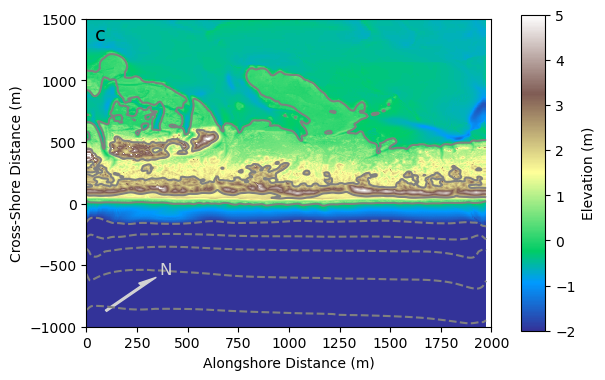

In [23]:
#### Initial bathy onlye
xs = 0
xe = 2000
ys = -1000
ye = 1500
levels = np.array( [-10, -8, -6, -4, -2, 0., 2.] )
print('Contour intervals: ', levels)
# north arrow calcs
# rot = 42
adx,ady = xycoord(.12, 90-42)

fig, ax0 = plt.subplots(1,1,figsize=(6,4),sharex=True)
m0 = ax0.pcolormesh(xisl,yisl, bathi,cmap='terrain',vmin=-2,vmax=5)
m0c = ax0.contour(xisl,yisl, bathis,levels,colors='gray',vmin=-2,vmax=5)
# ax0.plot(650,750,'oy',label='Sound')
# ax0.plot(650,50,'or',label='Ocean')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
#ax0.text(0.35, 0.9, '{}'.format(tstring[0]), transform=ax0.transAxes, ha='right')
ax0.arrow( .05, .05,  adx, ady, shape = 'right', width=.01, color='lightgray', transform=ax0.transAxes )
ax0.text( .05+adx+.04, .05+ady+.04,'N',fontsize=12, color='lightgray', transform=ax0.transAxes )
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.04, .79])
fig.colorbar(m0, cax=cbar_ax, label='Elevation (m)')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
ax0.text(.02, .98, 'c', horizontalalignment='left', verticalalignment='top', transform=ax0.transAxes, fontsize=14)

figname = 'init_bathy.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 

In [ ]:
#### Before/after bathy
xs = 0
xe = 2000
ys = -500
ye = 750
levels = np.array( [-6, -4, -2, 0., 2.] )
print('Contour intervals: ', levels)
# north arrow calcs
# rot = 42
adx,ady = xycoord(.12, 90-42)

fig, (ax0, ax1 ) = plt.subplots(2,1,figsize=(6,8),sharex=True)
m0 = ax0.pcolormesh(xisl,yisl, bathi,cmap='terrain',vmin=-2,vmax=5)
m0c = ax0.contour(xisl,yisl, bathis,levels,colors='gray',vmin=-2,vmax=5)
# ax0.plot(650,750,'oy',label='Sound')
# ax0.plot(650,50,'or',label='Ocean')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.text(0.35, 0.9, '{}'.format(tstring[0]), transform=ax0.transAxes, ha='right')
ax0.arrow( .05, .05,  adx, ady, shape = 'right', width=.01, color='lightgray', transform=ax0.transAxes )
ax0.text( .05+adx+.04, .05+ady+.04,'N',fontsize=12, color='lightgray', transform=ax0.transAxes )


m1 = ax1.pcolormesh(xisl,yisl, bathfs,cmap='terrain',vmin=-2,vmax=5)
m1c = ax1.contour(xisl,yisl, bathfs,levels,colors='gray',vmin=-2,vmax=5)
ax1.text(0.35, 0.9, '{}'.format(tstring[-1]), transform=ax1.transAxes, ha='right')
fig.text(0.02, 0.5, 'Cross-Shore Distance (m)', va='center', rotation='vertical')
ax1.set_xlabel('Alongshore Distance (m)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.04, 0.5])
fig.colorbar(m1, cax=cbar_ax, label='Elevation (m)')
ax1.set_xlim([xs, xe])
ax1.set_ylim([ys, ye])
ax1.arrow( .05, .05,  adx, ady, shape = 'right', width=.01, color='lightgray', transform=ax1.transAxes )
ax1.text( .05+adx+.04, .05+ady+.04,'N',fontsize=12, color='lightgray', transform=ax1.transAxes )

figname = run+'_int_final_bathy.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 

In [32]:
sed2i = np.squeeze( ds_CSYV.sandmass_02[0,:,:,:].load().values )
sed2f = np.squeeze( ds_CSYV.sandmass_02[-1,:,:,:].load().values )
sed3i = np.squeeze( ds_CSYV.sandmass_03[0,:,:,:].load().values )
sed3f = np.squeeze( ds_CSYV.sandmass_03[-1,:,:,:].load().values )
np.shape(sed2i)

(1057, 1317)

C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_2592\2653085203.py:8: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, (sed2f-sed2i)+(sed3f-sed3i), cmap='seismic',vmin=-5000, vmax=5000)


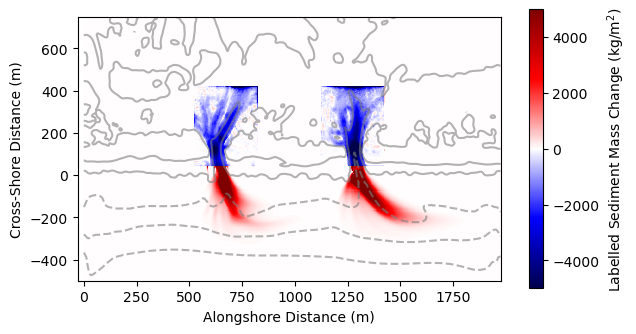

In [33]:
xs = 0
xe = 2000
ys = -500
ye = 750
levels = np.array( [-6, -4, -2, 0., 2.] )

fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, (sed2f-sed2i)+(sed3f-sed3i), cmap='seismic',vmin=-5000, vmax=5000)
ax0.contour(xisl, yisl, bathfs, levels, colors='gray', alpha=.6)
#ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label = 'Labelled Sediment Mass Change (kg/m$^2$)')
figname = run+'_labelled_sed_mass_diff.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 

i0, y[i0]: [168] [0.]
(1057,)


(-500.0, 500.0)

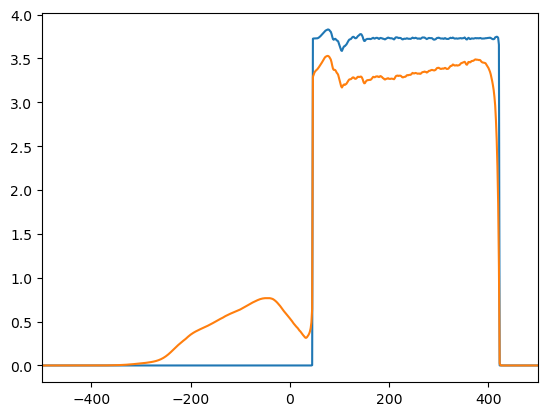

In [34]:
i0 = np.argwhere(y>=0.)[0]
print('i0, y[i0]:',i0, y[i0])
dy = np.diff(y)
dy = np.append( dy, dy[-1] )

voli = np.sum( (sed2i + sed3i), axis=1 )
volf = np.sum( (sed2f + sed3f), axis=1 )

delvol = volf-voli
print(np.shape(delvol))
plt.plot(y, voli/1.e6 )
plt.plot(y, volf/1.e6 )
#plt.plot(y, delvol/1.e6 )
#plt.plot(y, dy)
plt.xlim(-500, 500)

(-500.0, 0.0)

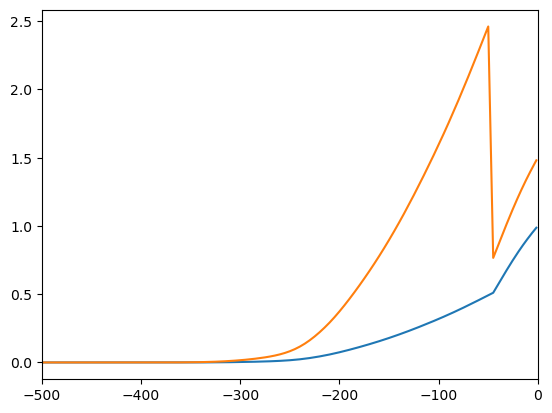

In [35]:
plt.plot(y[0:168], np.cumsum(volf)[0:168]/np.cumsum(volf)[168] )
plt.plot(y[0:168], dy[0:168]*np.cumsum(volf)[0:168]/np.cumsum(volf)[168] )
plt.xlim( -500, 0 )

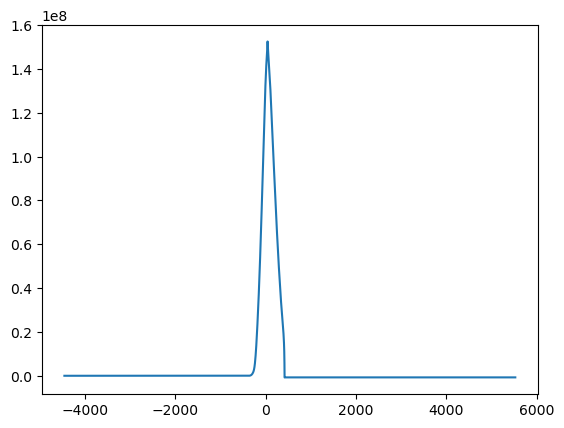

In [36]:
# this just confirms that the size classes are conserved
plt.plot(y, np.cumsum( delvol*dy ))

C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_2592\3238927798.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m0=ax0.pcolormesh(xisl, yisl, bdiff, cmap='seismic', vmin=-4, vmax=4)


Max., min., and mean bed diff.: 1.4781654 -4.5415716 -0.05071116


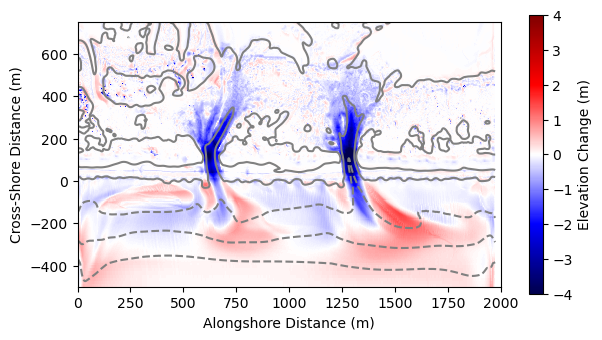

In [37]:
xs = 0
xe = 2000
ys = -500
ye = 750
levels = np.array( [-6, -4, -2, 0., 2.] )
fig, (ax0) = plt.subplots(1,1,figsize=(6,8),sharex=True)
m0=ax0.pcolormesh(xisl, yisl, bdiff, cmap='seismic', vmin=-4, vmax=4)
ax0.contour(xisl, yisl, bathfs, levels, colors='gray')
ax0.set_xlim([xs, xe])
ax0.set_ylim([ys, ye])
ax0.set_aspect('equal')
ax0.set_ylabel('Cross-Shore Distance (m)')
ax0.set_xlabel('Alongshore Distance (m)')
plt.colorbar(m0,fraction=0.03, pad=0.06, label='Elevation Change (m)')
figname = run+'_elevation_change.png'
plt.savefig( figname, dpi=200, bbox_inches='tight') 
print('Max., min., and mean bed diff.:', np.max(bdiff),np.min(bdiff),np.mean(bdiff))

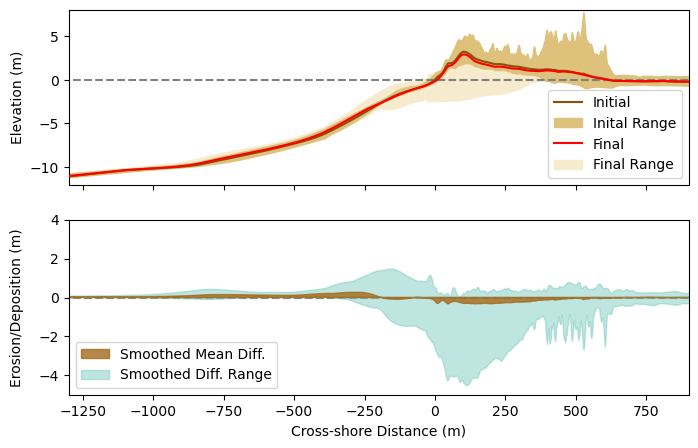

In [38]:
cmap = plt.get_cmap('BrBG')

ys = -1300
ye = 900

bdprof = running_mean( np.mean(bdiff[:,100:1200], axis=1), 5 )
bdprofmin = running_mean( np.min(bdiff[:,100:1200], axis=1), 5 )
bdprofmax = running_mean( np.max(bdiff[:,100:1200], axis=1), 5 )

bathyi_max = running_mean( np.max(bathi[:,100:1200], axis=1), 5 )
bathyi_min = running_mean( np.min(bathi[:,100:1200], axis=1), 5 )
bathyf_max = running_mean( np.max(bathf[:,100:1200], axis=1), 5 )
bathyf_min = running_mean( np.min(bathf[:,100:1200], axis=1), 5 )

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(8,5),sharex=True)
ax0.plot(y, np.zeros_like(y),'--',c='gray')
ax0.plot(y, np.mean(bathi[:,100:1200], axis=1), c = cmap(.1),label='Initial', zorder=3)
ax0.fill_between(y, bathyi_max, bathyi_min, color = cmap(.3), label='Inital Range', zorder=1)
ax0.plot(y, np.mean(bathf[:,100:1200], axis=1), '-r',label='Final', zorder=3 )
ax0.fill_between(y, bathyf_max, bathyf_min, color = cmap(.42), label='Final Range', zorder=0)
# ax0.plot(y, bathy_max, '-k',label='Max')
# ax0.plot(y, bathy_min, '-k',label='Min')
ax0.legend()
ax0.set_ylabel('Elevation (m)')


ax0.set_xlim([ys, ye])
ax0.set_ylim([-12, 8])

ax1.plot(y,np.zeros_like(y),'--',c='gray',zorder=0)
ax1.fill_between(y,bdprof,0,label='Smoothed Mean Diff.',color=cmap(.15),alpha=.8,zorder=1)
ax1.fill_between(y,bdprofmin,0,label='Smoothed Diff. Range',color=cmap(.7),alpha=.5, zorder=0)
ax1.fill_between(y,bdprofmax,0, color=cmap(.7),alpha=.5, zorder=0)
ax1.set_xlim([ys, ye])
ax1.set_ylim([-5, 4])
ax1.set_xlabel('Cross-shore Distance (m)')
plt.legend(loc='lower left')
ax1.set_ylabel('Erosion/Deposition (m)')
#fig.text(0.04, 0.5, 'Elevation (m)', va='center', rotation='vertical')
fig.align_labels()
figname = run+'_erosion_deposition_cross_section.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

176.8579153584466
net positive at : -190.0003187353329
y50, z50:  [-735.00122846] [-9.013431]
y25, z25:  [-1562.72557507] [-11.827576]
y5, z5:  [-3855.70476335] [-15.355657]


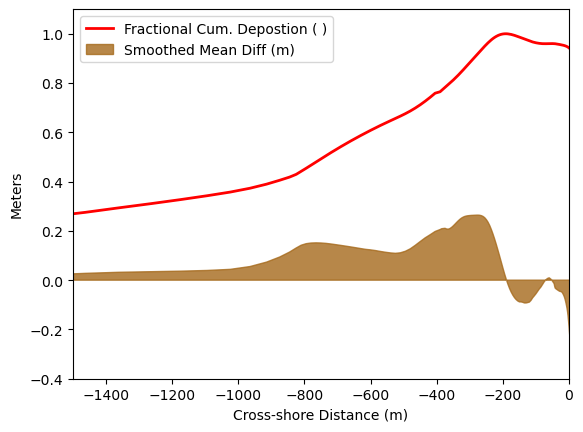

In [39]:
dy = np.diff(y)
dy = np.append( dy, dy[-1] )
cumdep = np.cumsum( bdprof*dy )
cumdepf = np.cumsum( np.flip(bdprof*dy) )

imax = np.argmax( cumdep )
cummax = cumdep[imax]
print(cummax)
print('net positive at :',y[imax] )

i50 = np.argwhere( cumdep/cummax >= 0.5 )[0]
print( 'y50, z50: ',y[i50], mbathi[i50] )
i25 = np.argwhere( cumdep/cummax >= 0.25 )[0]
print( 'y25, z25: ',y[i25], mbathi[i25] )
i5 = np.argwhere( cumdep/cummax >= 0.05 )[0]
print( 'y5, z5: ',y[i5], mbathi[i5] )

plt.plot(y, cumdep/cummax, linewidth=2, c='red', label='Fractional Cum. Depostion ( )')
plt.fill_between(y, bdprof, 0, color=cmap(.15),alpha=.8,zorder=1, label='Smoothed Mean Diff (m)')
plt.legend( loc = 'upper left')
plt.ylim( -.4, 1.1 )
plt.xlim( -1500, 0 )
plt.xlabel('Cross-shore Distance (m)')
plt.ylabel('Meters')
figname = run+'_cumulative_cross_section.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

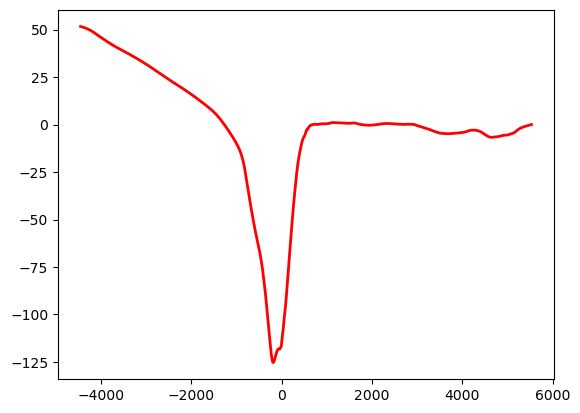

In [40]:
plt.plot(np.flip(y), cumdepf, linewidth=2, c='red', label='Fractional Cum. Depostion ( )')


#### Time-series of water elevations and difference - moved to _TWL_calcs.ipynb_

#### Location map for alongshore profiles and alongshore profiles.

C:\Users\csherwood\AppData\Local\Temp\1\ipykernel_2592\1132511887.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1 = ax.pcolormesh(xisl,yisl, bathf,cmap='terrain',vmin=-2,vmax=5, zorder=0)


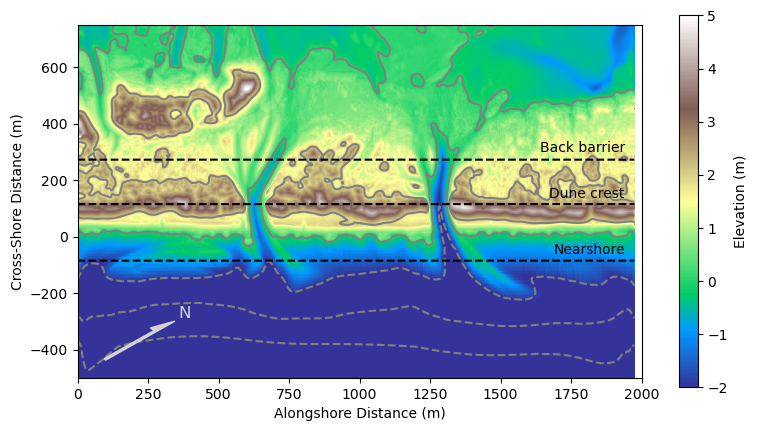

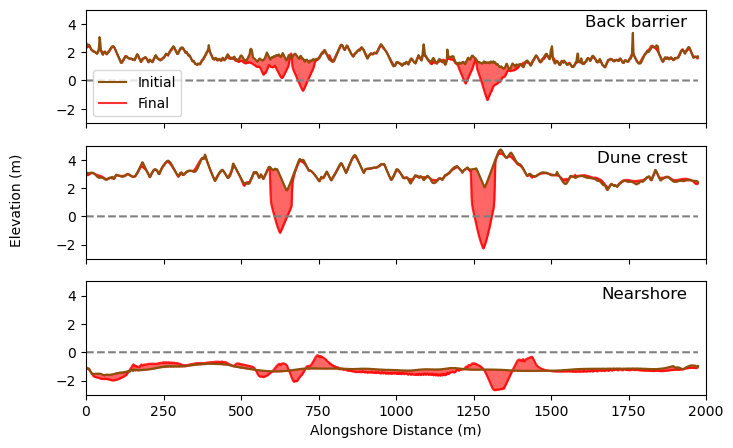

In [41]:
xs = 0
xe = 2000
ys = -500
ye = 750
xsect_list = [130,245,350]
#fig, ax = plt.subplots(2,1, sharex=True, figsize=(8,5), height_ratios=[3,1], constrained_layout=True)
fig, ax = plt.subplots(1,1, figsize=(8,6))

m1 = ax.pcolormesh(xisl,yisl, bathf,cmap='terrain',vmin=-2,vmax=5, zorder=0)
m1c = ax.contour(xisl,yisl, bathfs,levels,colors='gray',vmin=-2,vmax=5, zorder=1)
# ax.text(0.35, 0.9, '{}'.format(tstring[-1]), transform=ax.transAxes, ha='right')
ax.text(0.97, 0.51, 'Dune crest', transform=ax.transAxes, ha='right')
ax.text(0.97, 0.64, 'Back barrier', transform=ax.transAxes, ha='right')
ax.text(0.97, 0.35, 'Nearshore', transform=ax.transAxes, ha='right')

ax.set_ylabel('Cross-Shore Distance (m)')
ax.set_aspect('equal')

#fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.25, 0.04, 0.5])
#fig.colorbar(m1, cax=cbar_ax, label='Elevation (m)')
fig.colorbar(m1, fraction=0.03, pad=0.06, label='Elevation (m)')

ax.plot(x, y[xsect_list[0]]*np.ones_like(x), '--k')
ax.plot(x, y[xsect_list[1]]*np.ones_like(x), '--k')
ax.plot(x, y[xsect_list[2]]*np.ones_like(x), '--k')

ax.set_xlim([xs, xe])
ax.set_ylim([ys, ye])
ax.arrow( .05, .05,  adx, ady, shape = 'right', width=.01, color='lightgray', transform=ax.transAxes, zorder=2 )
ax.text( .05+adx+.04, .05+ady+.04,'N',fontsize=12, color='lightgray', transform=ax.transAxes, zorder=2 )
ax.set_xlabel('Alongshore Distance (m)')
figname = run+'alongshore_sec_loc.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

# alongshore profiles before/after
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,5) )
ax[0].plot(x, np.zeros_like(x),'--',c='gray')
ax[0].plot(x, bathi[xsect_list[2],:],label='Initial',c = cmap(.1),zorder=1)
ax[0].plot(x, bathf[xsect_list[2],:],label='Final', c='r', zorder=0, alpha=.8)
ax[0].fill_between(x, bathf[xsect_list[2],:], bathi[xsect_list[2],:], color='r', zorder=0, alpha=.6)

ax[0].set_ylim( [-3, 5] )
ax[0].set_xlim( [xs, xe] )
ax[0].legend( loc = 'lower left')
ax[0].text( .97, .85,'Back barrier',fontsize=12, ha='right', color='k', transform=ax[0].transAxes )

ax[1].plot(x, np.zeros_like(x),'--',c='gray')
ax[1].plot(x, bathi[xsect_list[1],:],label='Initial',c = cmap(.1),zorder=1)
ax[1].plot(x, bathf[xsect_list[1],:],label='Final', c='r', zorder=0, alpha=.8)
ax[1].fill_between(x, bathf[xsect_list[1],:], bathi[xsect_list[1],:],label='Final', color='r', zorder=0, alpha=.6)
ax[1].set_ylim( [-3, 5] )
ax[1].text( .97, .85,'Dune crest',fontsize=12, ha='right', color='k', transform=ax[1].transAxes )


ax[2].plot(x, np.zeros_like(x),'--',c='gray')
ax[2].plot(x, bathi[xsect_list[0],:],label='Initial', c = cmap(.1),zorder=1)
ax[2].plot(x, bathf[xsect_list[0],:],label='Final', c='r', zorder=0, alpha=.8)
ax[2].fill_between(x, bathf[xsect_list[0],:], bathi[xsect_list[0],:],label='Final', color='r', zorder=0, alpha=.6)

ax[2].set_ylim( [-3, 5] )
ax[2].text( .97, .85,'Nearshore',fontsize=12, ha='right', color='k', transform=ax[2].transAxes )


# ax[1].legend()
ax[2].set_xlabel('Alongshore Distance (m)')
fig.text(0.03, 0.5, 'Elevation (m)', va='center', rotation='vertical')
figname = run+'_alongshore_sections.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

### Comparison of channel widths / depths for various cases

In [42]:
ds_CSYV = xr.open_dataset(url_CSYV)
ds_CSNV = xr.open_dataset(url_CSNV)
ds_FSYV = xr.open_dataset(url_FSYV)
ds_FSNV = xr.open_dataset(url_FSNV)

bathf_CSYV = -ds_CSYV.bath[-1,:,:].load().values
bathf_CSNV = -ds_CSNV.bath[-1,:,:].load().values
bathf_FSYV = -ds_FSYV.bath[-1,:,:].load().values
bathf_FSNV = -ds_FSNV.bath[-1,:,:].load().values

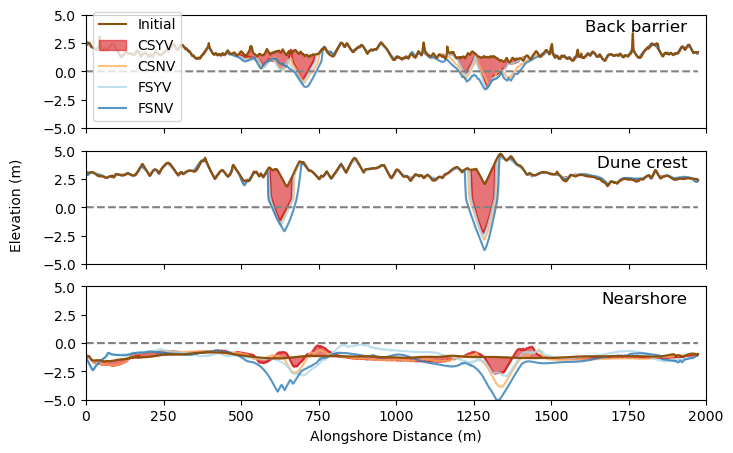

In [43]:
# Keep the the same from prior cell
# xs = 0
# xe = 2000
# ys = -500
# ye = 750
# xsect_list = [130,245,350]

# diverging colors from Color Brewer
divcol = ['#d7191c','#fdae61','#ffffbf','#abd9e9','#2c7bb6']

# alongshore profiles before/after
fig, ax = plt.subplots(3,1, sharex=True, figsize=(8,5) )
ax[0].plot(x, np.zeros_like(x),'--',c='gray')
ax[0].plot(x, bathi[xsect_list[2],:],label='Initial',c = cmap(.1),zorder=1)
ax[0].plot(x, bathf_CSYV[xsect_list[2],:], c=divcol[0], zorder=0, alpha=.8)
ax[0].fill_between(x, bathf[xsect_list[2],:], bathi[xsect_list[2],:],label='CSYV', color=divcol[0], zorder=0, alpha=.6)

ax[0].plot(x, bathf_CSNV[xsect_list[2],:],label='CSNV', c=divcol[1], zorder=0, alpha=.8)
ax[0].plot(x, bathf_FSYV[xsect_list[2],:],label='FSYV', c=divcol[3], zorder=0, alpha=.8)
ax[0].plot(x, bathf_FSNV[xsect_list[2],:],label='FSNV', c=divcol[4], zorder=0, alpha=.8)
ax[0].set_ylim( [-5, 5] )
ax[0].set_xlim( [xs, xe] )
ax[0].legend( loc = 'lower left')
ax[0].text( .97, .85,'Back barrier',fontsize=12, ha='right', color='k', transform=ax[0].transAxes )

ax[1].plot(x, np.zeros_like(x),'--',c='gray')
ax[1].plot(x, bathi[xsect_list[1],:],label='Initial',c = cmap(.1),zorder=1)
ax[1].plot(x, bathf_CSYV[xsect_list[1],:], c=divcol[0], zorder=0, alpha=.8)
ax[1].fill_between(x, bathf[xsect_list[1],:], bathi[xsect_list[1],:],label='CSYV', color=divcol[0], zorder=0, alpha=.6)
ax[1].plot(x, bathf_CSNV[xsect_list[1],:],label='CSNV', c=divcol[1], zorder=0, alpha=.8)
ax[1].plot(x, bathf_FSYV[xsect_list[1],:],label='FSYV', c=divcol[3], zorder=0, alpha=.8)
ax[1].plot(x, bathf_FSNV[xsect_list[1],:],label='FSNV', c=divcol[4], zorder=0, alpha=.8)
ax[1].set_ylim( [-5, 5] )
ax[1].text( .97, .85,'Dune crest',fontsize=12, ha='right', color='k', transform=ax[1].transAxes )


ax[2].plot(x, np.zeros_like(x),'--',c='gray')
ax[2].plot(x, bathi[xsect_list[0],:],label='Initial', c = cmap(.1),zorder=1)
ax[2].plot(x, bathf_CSYV[xsect_list[0],:], c=divcol[0], zorder=0, alpha=.8)
ax[2].fill_between(x, bathf[xsect_list[0],:], bathi[xsect_list[0],:],label='CSYV', color=divcol[0], zorder=0, alpha=.6)

ax[2].plot(x, bathf_CSNV[xsect_list[0],:],label='CSNV', c=divcol[1], zorder=0, alpha=.8)
ax[2].plot(x, bathf_FSYV[xsect_list[0],:],label='FSYV', c=divcol[3], zorder=0, alpha=.8)
ax[2].plot(x, bathf_FSNV[xsect_list[0],:],label='FSNV', c=divcol[4], zorder=0, alpha=.8)
ax[2].set_ylim( [-5, 5] )
ax[2].text( .97, .85,'Nearshore',fontsize=12, ha='right', color='k', transform=ax[2].transAxes )


# ax[1].legend()
ax[2].set_xlabel('Alongshore Distance (m)')
fig.text(0.03, 0.5, 'Elevation (m)', va='center', rotation='vertical')
figname = 'fig12cde_alongshore_sections_multicase.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')

#### Cross-barrier profile showing location of alongshore profiles

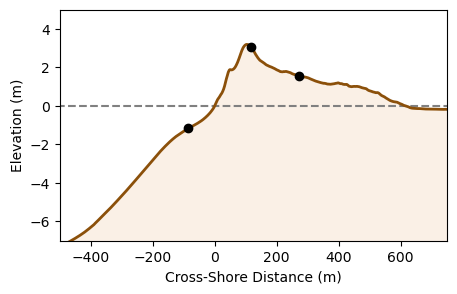

In [47]:
fig = plt.figure( figsize=(5,3) )
mbathi = np.mean(bathi[:,100:1200], axis=1)
plt.plot(y,np.zeros_like(mbathi),'--',c='gray')
plt.plot(y,mbathi,c = cmap(.1), linewidth=2)
plt.fill_between( y, mbathi, -8*np.ones_like(mbathi), color='linen' )
plt.plot(y[xsect_list[2]],mbathi[xsect_list[2]],'ok')
plt.plot(y[xsect_list[1]],mbathi[xsect_list[1]],'ok')
plt.plot(y[xsect_list[0]],mbathi[xsect_list[0]],'ok')

plt.xlim( ys, ye )
plt.ylim( [-7, 5] )
plt.ylabel('Elevation (m)')
plt.xlabel('Cross-Shore Distance (m)')
figname = 'fig12b_profile_sec_loc.png'
plt.savefig( figname, dpi=200, bbox_inches='tight')